In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sqlite
import os
from datetime import datetime
from sqlalchemy import create_engine

In [2]:
#creating a database for our train data downloaded
#chuncksize feature is used because data is very large(7 gb nearly) so direct pandas cant be used
if not os.path.isfile('data.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///data.db')
    start = datetime.now()
    chunksize = 1000000
    j = 0
    index_start = 1
    for df in pd.read_csv('train.csv',  names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)


In [3]:
#printing no. of rows in our training dataset
if os.path.isfile('data.db'):
    start = datetime.now()
    con = sqlite.connect('data.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    print("Number of rows in my database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("download the file in my database first")

Number of rows in my database : 
 6034196
Time taken to count the number of rows : 0:01:20.209684


In [4]:
#as our total data is large(nearly 7000000),quite large for 8 gb ram box,so i will take only 1000000 rows in new database file
if os.path.isfile('data.db'):
    start = datetime.now()
    con = sqlite.connect('data.db')
    train = pd.read_sql_query("""SELECT * FROM data LIMIT 1000000""", con)
    con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("download the file in my database first")

Time taken to run this cell : 0:00:59.012897


In [5]:
print(train.head(10))

   index  Id                                              Title  \
0      1  Id                                              Title   
1      2   1  How to check if an uploaded file is an image w...   
2      3   2  How can I prevent firefox from closing when I ...   
3      4   3           R Error Invalid type (list) for variable   
4      5   4      How do I replace special characters in a URL?   
5      6   5               How to modify whois contact details?   
6      7   6      setting proxy in active directory environment   
7      8   7      How to draw barplot in this way with Coreplot   
8      9   8             How to fetch an XML feed using asp.net   
9     10   9            .NET library for generating javascript?   

                                                Body  \
0                                               Body   
1  <p>I'd like to check if an uploaded file is an...   
2  <p>In my favorite editor (vim), I regularly us...   
3  <p>I am import matlab file and cons

In [6]:
#storing that 1000000 rows of data in new database traindata.db
if not os.path.isfile('traindata.db'):
    start=datetime.now()
    disk_train=create_engine("sqlite:///traindata.db")
    data1=pd.DataFrame(train,columns=['Title','Body','Tags'])
    data1.to_sql("trainset",disk_train)
    print("Time taken to run this cell: ",datetime.now()-start)

In [7]:
#taking non duplicate data into df_no_dup
#adding another feature in data that counts the frequency of occurence of questions
if os.path.isfile('traindata.db'):
    start=datetime.now()
    con=sqlite.connect('traindata.db')
    df_no_dup=pd.read_sql_query("""SELECT Title,Body,Tags,count(*) as count_dup FROM trainset GROUP BY Title,Body,Tags""",con)
    con.close()
    print("Time taken to run this cell: ",datetime.now()-start)
else:
    print("create the small database first in your system")

Time taken to run this cell:  1:00:40.324143


In [8]:
print(df_no_dup.head(1000))

                                                 Title  \
0             Dynamic Datagrid Binding in Silverlight?   
1      "SQL Injection" issue preventing correct for...   
2      Undefined symbols for architecture i386: _OB...   
3      obtaining updated locations using gps in ser...   
4     $f$ a continuous function in [0,1], Show: $\l...   
..                                                 ...   
995         "Method group"-esque syntax in Javascript?   
996                     "Method overloading" in python   
997  "Microsoft JScript runtime error: Unable to ge...   
998  "Microsoft Office (any app) has not been insta...   
999  "Microsoft Office Word" option is gone from th...   

                                                  Body  \
0    <p>I should do binding for datagrid dynamicall...   
1    <p>So I've been checking everything I can thin...   
2    <p>I have imported framework for sending email...   
3    <p>I have app in which i have two buttons <str...   
4    <p>Let $

In [9]:
#no. of duplicate data in 1000000 rows
print("no. of duplicate questions: ",1000000-df_no_dup.shape[0])

no. of duplicate questions:  56418


In [10]:
#percentage of them
print("percentage of duplicate data: ",((1000000-df_no_dup.shape[0])/1000000)*100)

percentage of duplicate data:  5.6418


In [11]:
print(df_no_dup.count_dup.value_counts())

1    888457
2     53832
3      1293
Name: count_dup, dtype: int64


In [12]:
#adding a new feature i.e no. of tags per questions
start=datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(" ")))
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()

AttributeError: 'NoneType' object has no attribute 'split'

In [13]:
#since error is coming as any text inside our tag is none,so we will find index of that None tag
k=0
for text in df_no_dup["Tags"]:
    if(text!=None):
        k=k+1
    else:
        print(k)

        


174937


In [14]:
#checking is it really a none
print(df_no_dup["Tags"][174937])

None


In [15]:
df_no_dup["Tags"][174937]="hitika"

C:\Users\aditya raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
#adding a new feature i.e no. of tags per questions
start=datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(" ")))
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head(1000)

Time taken to run this cell : 0:00:01.364463


Title  \
0             Dynamic Datagrid Binding in Silverlight?   
1      "SQL Injection" issue preventing correct for...   
2      Undefined symbols for architecture i386: _OB...   
3      obtaining updated locations using gps in ser...   
4     $f$ a continuous function in [0,1], Show: $\l...   
..                                                 ...   
995         "Method group"-esque syntax in Javascript?   
996                     "Method overloading" in python   
997  "Microsoft JScript runtime error: Unable to ge...   
998  "Microsoft Office (any app) has not been insta...   
999  "Microsoft Office Word" option is gone from th...   

                                                  Body  \
0    <p>I should do binding for datagrid dynamicall...   
1    <p>So I've been checking everything I can thin...   
2    <p>I have imported framework for sending email...   
3    <p>I have app in which i have two buttons <str...   
4    <p>Let $f$ be a continuous function in [0,1] a...   
..                                                 ...   
995  <p>C# has an awesome syntactical feature where...   
996  <p>I think the concept is called overloading.\...   
997  <p>I am trying to pop up a message if session ...   
998  <p>I had Office XP pro (2002) working, but I s...   
999  <blockquote>\n  <p><strong>Possible Duplicate:...   

                                          Tags  count_dup  tag_count  
0                  c# silverlight data-binding          1          3  
1                                    php forms          1          2  
2                     iphone email-integration          1          2  
3       android android-widget android-service          1          3  
4                                     calculus          2          1  
..                                         ...        ...        ...  
995                              c# javascript          1          2  
996           python design method-overloading          1          3  
997                       jquery asp.net-mvc-2          1          2  
998              microsoft-office installation          1          2  
999  windows-7 microsoft-word microsoft-office          1          3  

[1000 rows x 5 columns]

In [17]:
print(df_no_dup.tag_count.value_counts())

3    270001
2    250990
4    181406
1    129670
5    111515
Name: tag_count, dtype: int64


In [18]:
#Creating a new database with no duplicates
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

In [19]:
#creating file with tags only for prediction
if os.path.isfile('train_no_dup.db'):
    start=datetime.now()
    con=sqlite.connect('train_no_dup.db')
    tag_data=pd.read_sql_query("""SELECT Tags FROM no_dup_train""",con)
    con.close()
    
    tag_data.drop(tag_data.index[0],inplace=True)
    print("Time taken to run the cell: ",datetime.now()-start)
else:
    print("download the file first")
    

Time taken to run the cell:  0:00:50.229674


In [20]:
print(tag_data.head(1000))

                                           Tags
1                                     php forms
2                      iphone email-integration
3        android android-widget android-service
4                                      calculus
5              c# visual-c++ opencv emgucv emgu
...                                         ...
996            python design method-overloading
997                        jquery asp.net-mvc-2
998               microsoft-office installation
999   windows-7 microsoft-word microsoft-office
1000                           visual-studio f#

[1000 rows x 1 columns]


In [21]:
#using simple BOW to featurize text data into mathematical form
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(tokenizer=lambda x:x.split())
tag_dtm=vectorizer.fit_transform(tag_data["Tags"])


In [22]:
print("total no. of datapoints: ",tag_dtm.shape[0])
print("no. of unique tags: ",tag_dtm.shape[1])

total no. of datapoints:  943581
no. of unique tags:  34946


In [23]:
#names of featurized text data
tags=vectorizer.get_feature_names()
print(tags)

['.a', '.app', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each', '.emf', '.exe', '.hgtags', '.htaccess', '.htpasswd', '.ico', '.lib', '.lrc', '.mov', '.net', '.net-1.0', '.net-1.1', '.net-2.0', '.net-3.0', '.net-3.5', '.net-4.0', '.net-4.0-beta-2', '.net-4.0-rc1', '.net-4.5', '.net-assembly', '.net-authorization', '.net-cf-3.5', '.net-client-profile', '.net-framework', '.net-framework-source', '.net-framework-version', '.net-gadgeteer', '.net-install', '.net-micro-framework', '.net-reflector', '.net-remoting', '.net-security', '.net-services', '.net2.0', '.net3.5', '.net4.0', '.netrc', '.nettiers', '.obj', '.post', '.procmailrc', '.profile', '.railsrc', '.rdlc', '.refresh', '.screenrc', '.sdf', '.vdproj', '.war', '.wav', '.when', '.x', '1080p', '10gbethernet', '10gen-csharp-driver', '10gige', '11g', '12.10', '120hz', '16-bit', '16bit', '1and1', '1wire', '2-3-4-tree', '2-digit-year', '2-legged', '2-tier', '2-way-object-databinding', '2003', '

In [24]:
#mathematical values of text data
print(tag_dtm)

  (0, 22633)	1
  (0, 10932)	1
  (1, 14675)	1
  (1, 9021)	1
  (2, 1020)	1
  (2, 1236)	1
  (2, 1199)	1
  (3, 3735)	1
  (4, 3606)	1
  (4, 32699)	1
  (4, 21239)	1
  (4, 9079)	1
  (4, 9078)	1
  (5, 10823)	1
  (5, 34339)	1
  (5, 17307)	1
  (5, 16627)	1
  (6, 22100)	1
  (6, 12739)	1
  (6, 9725)	1
  (7, 16794)	1
  (7, 10365)	1
  (8, 22633)	1
  (8, 11980)	1
  (8, 11995)	1
  :	:
  (943572, 34539)	1
  (943572, 8212)	1
  (943573, 22633)	1
  (943573, 15101)	1
  (943573, 19497)	1
  (943573, 32200)	1
  (943573, 9120)	1
  (943574, 700)	1
  (943575, 3606)	1
  (943575, 33667)	1
  (943575, 27483)	1
  (943576, 27591)	1
  (943576, 26646)	1
  (943577, 22633)	1
  (943577, 22634)	1
  (943577, 22646)	1
  (943577, 34845)	1
  (943578, 22633)	1
  (943578, 19497)	1
  (943578, 30274)	1
  (943579, 22633)	1
  (943579, 9008)	1
  (943579, 21719)	1
  (943579, 18411)	1
  (943580, 13216)	1


In [25]:
#making dictionary/hash table with no.of tags and tag name
freq_tags=tag_dtm.sum(axis=0).A1
tag_freq=dict(zip(tags,freq_tags))

In [26]:
#printing dictionary
print(tag_freq)

{'.a': 3, '.app': 11, '.aspxauth': 5, '.bash-profile': 29, '.class-file': 12, '.cs-file': 1, '.doc': 9, '.drv': 1, '.ds-store': 3, '.each': 51, '.emf': 8, '.exe': 4, '.hgtags': 2, '.htaccess': 3316, '.htpasswd': 6, '.ico': 2, '.lib': 3, '.lrc': 1, '.mov': 4, '.net': 25583, '.net-1.0': 2, '.net-1.1': 48, '.net-2.0': 379, '.net-3.0': 7, '.net-3.5': 832, '.net-4.0': 1115, '.net-4.0-beta-2': 3, '.net-4.0-rc1': 1, '.net-4.5': 147, '.net-assembly': 110, '.net-authorization': 2, '.net-cf-3.5': 10, '.net-client-profile': 12, '.net-framework': 63, '.net-framework-source': 5, '.net-framework-version': 13, '.net-gadgeteer': 2, '.net-install': 3, '.net-micro-framework': 22, '.net-reflector': 8, '.net-remoting': 29, '.net-security': 1, '.net-services': 3, '.net2.0': 3, '.net3.5': 8, '.net4.0': 7, '.netrc': 3, '.nettiers': 7, '.obj': 12, '.post': 19, '.procmailrc': 3, '.profile': 3, '.railsrc': 1, '.rdlc': 12, '.refresh': 1, '.screenrc': 1, '.sdf': 3, '.vdproj': 1, '.war': 6, '.wav': 9, '.when': 1, 

In [27]:
#making file of csv form with dictionary
import csv
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in tag_freq.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict.csv", names=['Tags', 'counts'])
print(tag_df)

                Tags  counts
0                 .a       3
1               .app      11
2          .aspxauth       5
3      .bash-profile      29
4        .class-file      12
...              ...     ...
34941          zxing     112
34942     zxspectrum       1
34943         zypper       4
34944         zywall       1
34945          zyxel      11

[34946 rows x 2 columns]


In [28]:
sorted_tags_dict=tag_df.sort_values(['counts'],ascending=False)
tag_counts=sorted_tags_dict['counts'].values

In [29]:
#final frequency of tags
print(tag_counts)

[73027 64770 61712 ...     1     1     1]


In [30]:
print(sorted_tags_dict)

              Tags  counts
3606            c#   73027
15027         java   64770
22633          php   61712
15101   javascript   57722
1020       android   50630
...            ...     ...
17700    materials       1
25568  restitution       1
9366   errorformat       1
30081        teeth       1
22691       phpbms       1

[34946 rows x 2 columns]


In [31]:
#plotting tags with there frequencies to analyse the tags
import matplotlib.pyplot as plt
plt.plot(tag_counts)
plt.xlabel("tag no. in sorted manner")
plt.ylabel("frequency of tags")
plt.grid()
plt.show()


<Figure size 640x480 with 1 Axes>

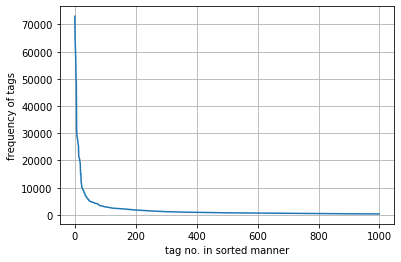

In [32]:
#zooming on the plot to observe
import matplotlib.pyplot as plt
plt.plot(tag_counts[:1000])
plt.xlabel("tag no. in sorted manner")
plt.ylabel("frequency of tags")
plt.grid()
plt.show()

In [33]:
print("tags used more than 10k times: ",len(tag_df[tag_df.counts>10000].Tags))

tags used more than 10k times:  25


In [34]:
print("tags used more than 1k times: ",len(tag_df[tag_df.counts>1000].Tags))

tags used more than 1k times:  366


In [35]:
print("top 25 tags: ","\n", sorted_tags_dict.Tags[:24])

top 25 tags:  
 3606                c#
15027             java
22633              php
15101       javascript
1020           android
15472           jquery
3615               c++
24155           python
14675           iphone
1846           asp.net
19497            mysql
13216             html
19                .net
14617              ios
20853      objective-c
28444              sql
6208               css
16794            linux
26105    ruby-on-rails
33566          windows
3605                 c
28476       sql-server
26087             ruby
34050              wpf
Name: Tags, dtype: object


In [36]:
#we will store no. of tags per question in tags count
tags_count=tag_dtm.sum(axis=1).tolist()
print(len(tags_count))
tags_freq = []
for freq in tags_count:
    for x in freq:
        tags_freq.append(int(x))
    
print(tags_freq)

943581
[2, 2, 3, 1, 5, 4, 3, 2, 5, 1, 2, 4, 4, 4, 3, 1, 1, 3, 3, 5, 4, 5, 4, 2, 3, 3, 5, 4, 4, 2, 3, 4, 1, 2, 3, 2, 3, 1, 2, 1, 4, 5, 2, 2, 3, 3, 4, 2, 4, 1, 2, 4, 3, 3, 4, 5, 3, 5, 4, 3, 5, 2, 5, 5, 3, 3, 3, 5, 3, 2, 4, 3, 2, 5, 1, 3, 3, 3, 1, 1, 5, 3, 1, 1, 2, 3, 4, 4, 3, 1, 3, 1, 1, 2, 1, 2, 1, 4, 1, 5, 1, 3, 3, 2, 3, 2, 2, 1, 1, 3, 2, 3, 3, 2, 3, 1, 3, 4, 1, 2, 3, 1, 2, 1, 1, 3, 3, 3, 3, 3, 2, 4, 4, 4, 4, 5, 4, 3, 2, 2, 4, 5, 4, 2, 3, 1, 1, 2, 5, 4, 2, 3, 2, 2, 5, 3, 3, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 5, 4, 1, 4, 2, 3, 2, 2, 3, 4, 1, 2, 4, 4, 2, 3, 3, 3, 3, 4, 2, 1, 1, 2, 1, 5, 2, 5, 4, 5, 2, 5, 5, 2, 4, 2, 3, 4, 3, 2, 2, 3, 2, 3, 5, 2, 3, 2, 4, 4, 4, 2, 3, 3, 2, 2, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 2, 3, 1, 2, 1, 3, 4, 4, 3, 3, 3, 1, 5, 3, 3, 2, 2, 5, 4, 1, 4, 3, 1, 3, 5, 2, 4, 2, 5, 2, 3, 3, 2, 4, 3, 2, 5, 2, 4, 4, 2, 5, 3, 2, 4, 2, 2, 1, 2, 5, 5, 5, 5, 4, 4, 3, 2, 2, 5, 2, 4, 5, 4, 4, 3, 1, 1, 3, 2, 5, 5, 4, 1, 3, 2, 5, 2, 4, 3,

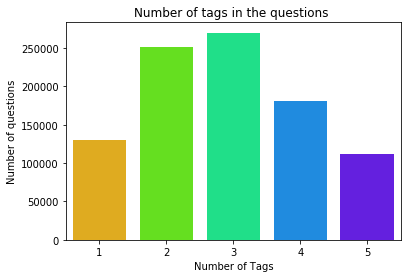

In [37]:
#plotting histogram for no. of tags per questions
import seaborn as sns
sns.countplot(tags_freq,palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

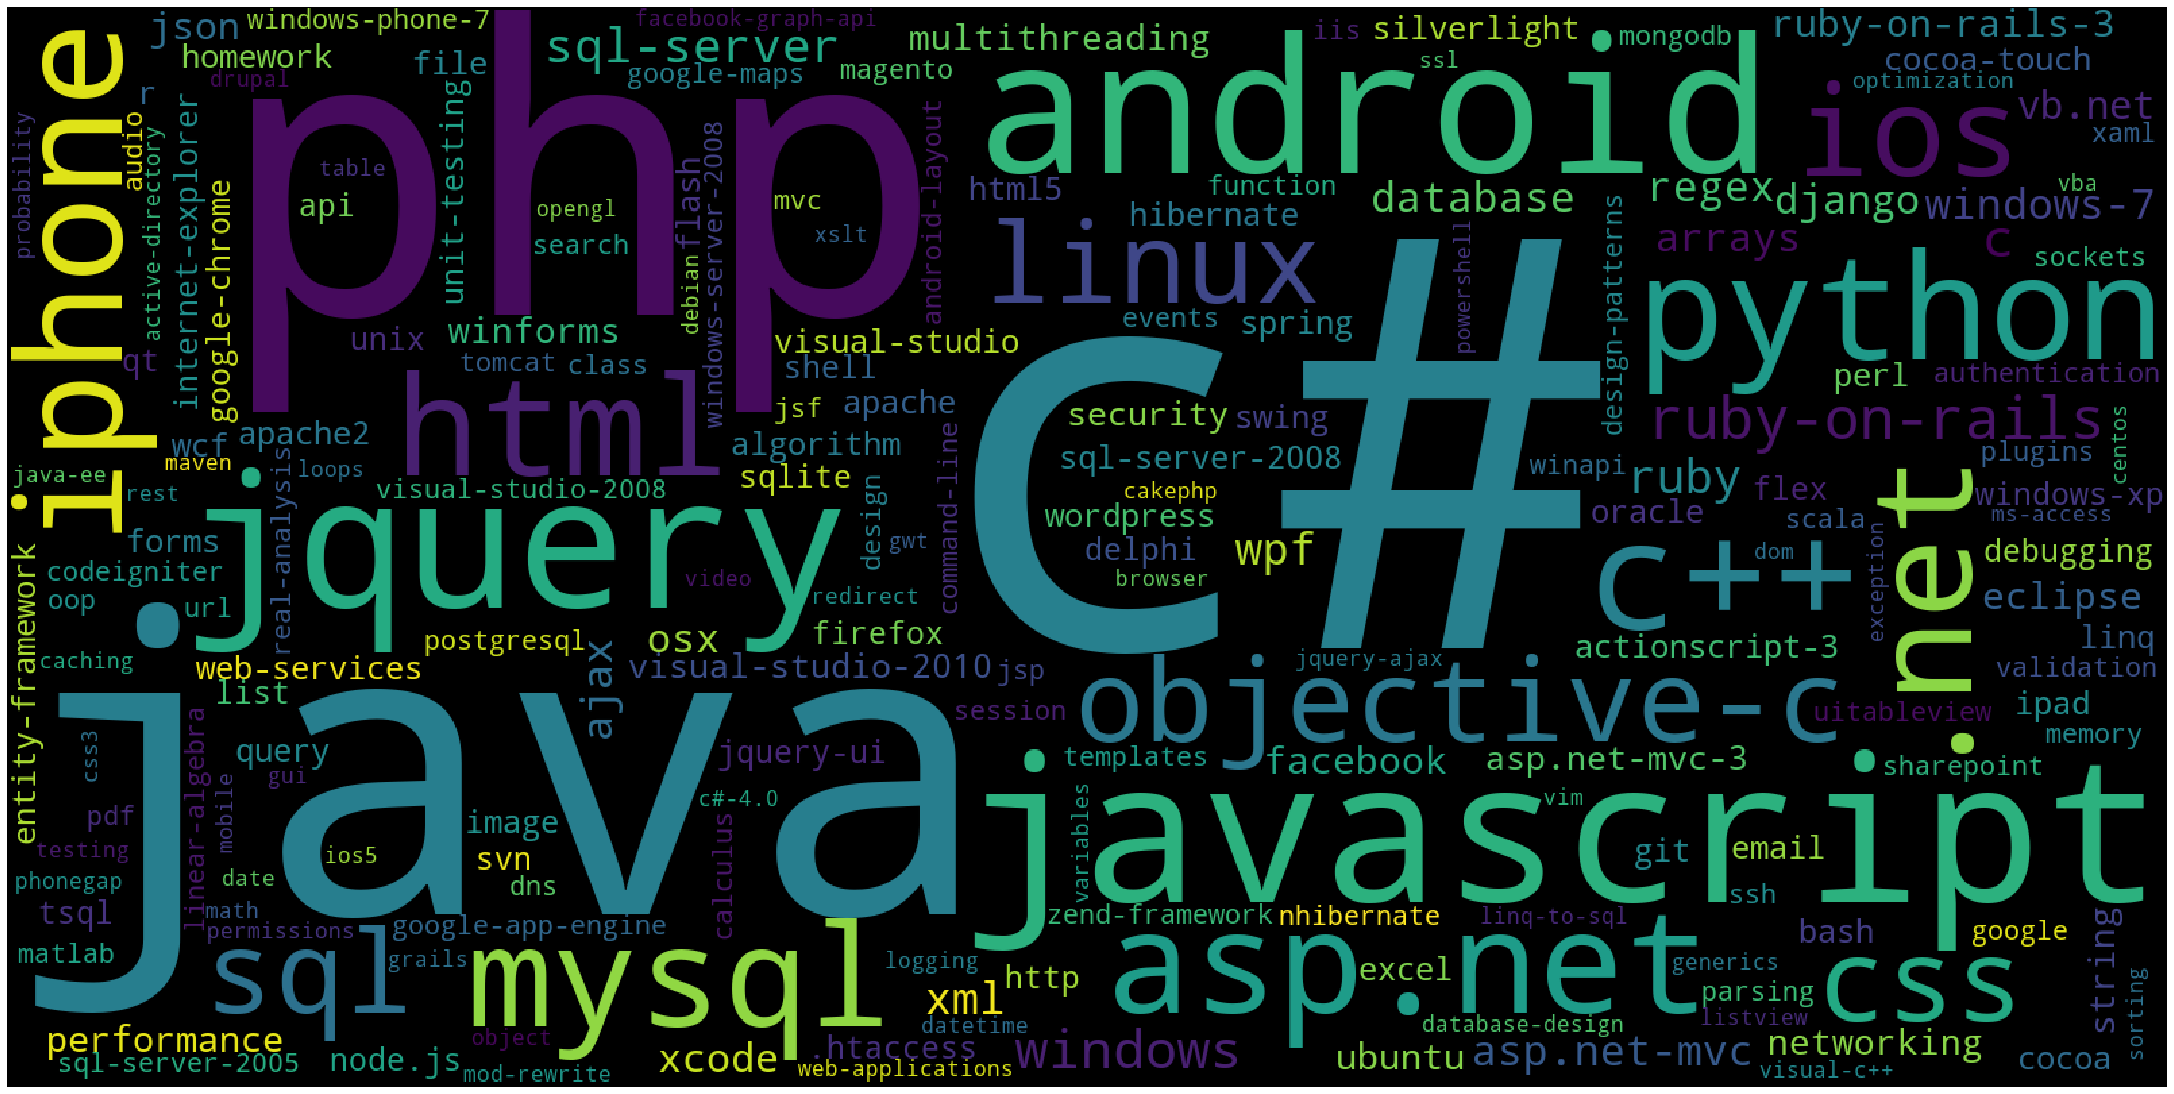

Time taken to run this cell : 0:00:10.061689


In [38]:
!pip install wordcloud
start = datetime.now()
from wordcloud import WordCloud
# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(tag_freq.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

In [39]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [40]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [41]:
print(stop_words)

{'myself', 'themselves', 'for', 'during', 'hasn', 'they', 'further', 'he', 'don', 'ain', 'didn', 'below', 'it', 'or', 'at', 'our', 'whom', 'after', 'on', 'a', 'we', "shouldn't", 'here', "you've", 'with', 'all', 'had', 'into', 'an', 'because', 'those', 'm', 'wouldn', 'off', "haven't", 'just', 'being', 'why', 'same', 'you', 'couldn', 'll', 'ma', 'once', 'and', 'such', 'between', 'shan', 'will', 'd', 'shouldn', 'yours', 'him', 'under', 'isn', 'very', "weren't", 'herself', 'y', 're', "needn't", 'its', 'am', 'is', 'nor', "wouldn't", 'other', 'ourselves', 've', 'each', 'i', "hasn't", 'where', 'be', 'from', 'there', 'his', 'were', 'did', 'them', 'when', 'so', 'through', 'then', 'few', 'ours', 'their', "you'd", 'which', 'these', 'was', 'my', 'about', 'hadn', "isn't", "wasn't", 's', 'out', 'to', "mightn't", 'again', 'some', 'than', "couldn't", 'how', 'hers', 'most', 'now', 'before', 'your', 'weren', 'until', 'have', 'above', 'her', "doesn't", 'she', 'does', "don't", 'the', "you'll", "hadn't", "

In [42]:
print(stemmer.stem('taste'))

tast


In [43]:
# this function based code snippet is taken from ajaysh2193(credits to him)
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [44]:
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 1:12:49.466867


In [49]:
print(reader)

In [58]:
import re
import nltk
nltk.download('punkt')
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
#next few lines of code is also taken from ajaysh123(credits to him)
for row in reader:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)


print("Time taken to run this cell :", datetime.now() - start)


[nltk_data] Downloading package punkt to C:\Users\aditya
[nltk_data]     raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ProgrammingError: Cannot operate on a closed database.

In [53]:
# close the connections, or else you will end up with locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [54]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()


Questions after preprocessed
('unabl connect ssms microsoft sql server error sql server manag studio connect databas server machin product server wherea product site access databas tri connect databas ssms get error connect network relat instanc specif error occur establish connect sql server server found access verifi instanc name correct sql server configur allow remot connect provid name pipe provid error could open connect sql server microsoft sql server error use ssms last coupl year ssms run fine sinc year product databas server close ever connect ssms face issu wherea site access databas work fine also tri access databas sqlcmd luck face face error hresult level state name pipe provid could open connect sql server sqlcmd error microsoft sql server nativ client network relat instanc specif error occur establish connect sql server server found access check instanc name correct sql server configur allow remot connect inform see sql server book onlin',)
-----------------------------

In [55]:
#Taking 1 Million entries to a dataframe.
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [56]:
preprocessed_data.head(100)

question  \
0   share python virtualenv environ python virtual...   
1   unabl connect ssms microsoft sql server error ...   
2   window licens key possibl duplic reinstal wind...   
3   render overlap transluc object without darken ...   
4   make customlink touchabl ohattributedlabel suc...   
..                                                ...   
95  websit data retriev recent articl prompt pick ...   
96  javascript librari implement sort method alpha...   
97  get refer namespac microsoft webpag compil dev...   
98  use web html http protocol applic requir click...   
99  color scheme name php tag sublim text mess aro...   

                                                 tags  
0                 python virtualenv virtualenvwrapper  
1                 sql sql-server sql-server-2008 ssms  
2                                           windows-7  
3                            iphone opengl-es cocos2d  
4                                         ios uilabel  
..                                                ...  
95                                 api data-retrieval  
96  javascript sorting localization internationali...  
97                                      asp.net-mvc-3  
98                                         loadrunner  
99                                     sublime-text-2  

[100 rows x 2 columns]

In [59]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 499999
number of dimensions : 2


In [60]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [61]:
#here t stores the frequency of every tags 
#here we are taking t in which frequency of every tag is stored and then after sorting t,original index foe sorted t is stored 
#in sorted tag i
t = multilabel_y.sum(axis=0).tolist()[0]
sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
print(len(sorted_tags_i))  

30546


In [62]:
print(sorted_tags_i)
#it basically means if 1st element of soted_tags_i is 3606, then t[3606] is maximum or tag no. 3606 has max. frequency,then 
#tag no.15027 and then so on

[3203, 13163, 19790, 13231, 899, 13550, 3211, 21115, 12852, 1648, 17088, 11579, 16, 12800, 18258, 24840, 5480, 14702, 22814, 29318, 3202, 24869, 22798, 29750, 30069, 671, 5883, 21990, 1665, 29324, 29964, 6923, 18959, 1588, 28248, 8672, 7701, 22816, 13740, 27473, 19611, 17493, 25379, 16988, 29494, 1668, 28587, 23343, 2337, 28869, 11465, 12110, 11630, 28580, 29634, 9599, 29003, 10306, 18832, 21401, 24873, 14679, 736, 19628, 9287, 24752, 335, 12838, 24003, 1220, 21503, 4260, 1276, 7913, 4264, 25783, 11319, 8380, 8089, 8986, 9337, 1289, 14723, 24939, 23851, 13650, 12669, 27239, 10, 6374, 10556, 21292, 9207, 17696, 6216, 11664, 25739, 27817, 29469, 24871, 27793, 4007, 20324, 10536, 4376, 28175, 18535, 15535, 9850, 12064, 24396, 19329, 15787, 4562, 29410, 25017, 13765, 26320, 23288, 1904, 29279, 16495, 10623, 23790, 29925, 30431, 29440, 8350, 17033, 26884, 23035, 15224, 19509, 20109, 6479, 3322, 28584, 21799, 6474, 7098, 23629, 22335, 10515, 1862, 14619, 27943, 17569, 27631, 8694, 13721, 282

In [63]:
multilabel_yn=multilabel_y[:,sorted_tags_i[:500]]
#here in multilabel_yn, all questions along with first 500 most repeated tags is taken
print(multilabel_yn)

  (0, 7)	1
  (1, 15)	1
  (1, 21)	1
  (1, 60)	1
  (2, 29)	1
  (3, 8)	1
  (3, 322)	1
  (4, 13)	1
  (5, 2)	1
  (5, 54)	1
  (6, 90)	1
  (6, 3)	1
  (7, 4)	1
  (9, 5)	1
  (11, 0)	1
  (11, 173)	1
  (12, 66)	1
  (13, 0)	1
  (13, 43)	1
  (14, 156)	1
  (15, 8)	1
  (15, 13)	1
  (16, 4)	1
  (17, 17)	1
  (17, 178)	1
  :	:
  (499989, 0)	1
  (499989, 77)	1
  (499989, 407)	1
  (499989, 427)	1
  (499989, 276)	1
  (499990, 9)	1
  (499990, 82)	1
  (499990, 140)	1
  (499990, 390)	1
  (499991, 137)	1
  (499991, 135)	1
  (499991, 487)	1
  (499992, 2)	1
  (499992, 3)	1
  (499992, 5)	1
  (499993, 3)	1
  (499993, 5)	1
  (499994, 2)	1
  (499995, 303)	1
  (499996, 15)	1
  (499996, 21)	1
  (499997, 12)	1
  (499997, 9)	1
  (499998, 29)	1
  (499998, 238)	1


In [64]:
questions_in_top_500_tags=multilabel_yn.sum(axis=0).tolist()
print(questions_in_top_500_tags)

[[38609, 34213, 32782, 30391, 26811, 25215, 16650, 15429, 15246, 14793, 14274, 13708, 13561, 11366, 11304, 11070, 10689, 10398, 9897, 8081, 7923, 6241, 6035, 5552, 5318, 5139, 4983, 4903, 4812, 4738, 4521, 4285, 4244, 4171, 3961, 3703, 3687, 3661, 3641, 3428, 3352, 3177, 3170, 3150, 3071, 2926, 2901, 2803, 2708, 2693, 2688, 2638, 2575, 2554, 2548, 2533, 2523, 2491, 2469, 2469, 2449, 2430, 2423, 2350, 2324, 2297, 2291, 2289, 2286, 2237, 2196, 2184, 2176, 2175, 2158, 2137, 2086, 2002, 1989, 1930, 1905, 1874, 1841, 1817, 1807, 1773, 1772, 1763, 1746, 1743, 1743, 1731, 1724, 1663, 1645, 1638, 1636, 1625, 1597, 1574, 1574, 1566, 1565, 1564, 1544, 1533, 1522, 1520, 1513, 1477, 1460, 1450, 1436, 1425, 1422, 1421, 1417, 1399, 1388, 1373, 1353, 1349, 1341, 1340, 1334, 1318, 1300, 1299, 1295, 1294, 1292, 1287, 1282, 1276, 1272, 1271, 1271, 1265, 1256, 1255, 1249, 1242, 1236, 1231, 1231, 1231, 1219, 1215, 1209, 1207, 1207, 1203, 1192, 1190, 1180, 1177, 1174, 1173, 1162, 1143, 1138, 1135, 1134, 11

In [65]:
multilabel_yn=multilabel_y[:,sorted_tags_i[:500]]
#here in multilabel_yn, all questions along with first 500 most repeated tags is taken
print(multilabel_yn)

  (0, 7)	1
  (1, 15)	1
  (1, 21)	1
  (1, 60)	1
  (2, 29)	1
  (3, 8)	1
  (3, 322)	1
  (4, 13)	1
  (5, 2)	1
  (5, 54)	1
  (6, 90)	1
  (6, 3)	1
  (7, 4)	1
  (9, 5)	1
  (11, 0)	1
  (11, 173)	1
  (12, 66)	1
  (13, 0)	1
  (13, 43)	1
  (14, 156)	1
  (15, 8)	1
  (15, 13)	1
  (16, 4)	1
  (17, 17)	1
  (17, 178)	1
  :	:
  (499989, 0)	1
  (499989, 77)	1
  (499989, 407)	1
  (499989, 427)	1
  (499989, 276)	1
  (499990, 9)	1
  (499990, 82)	1
  (499990, 140)	1
  (499990, 390)	1
  (499991, 137)	1
  (499991, 135)	1
  (499991, 487)	1
  (499992, 2)	1
  (499992, 3)	1
  (499992, 5)	1
  (499993, 3)	1
  (499993, 5)	1
  (499994, 2)	1
  (499995, 303)	1
  (499996, 15)	1
  (499996, 21)	1
  (499997, 12)	1
  (499997, 9)	1
  (499998, 29)	1
  (499998, 238)	1


In [66]:
#no. of questions having no tags among first 500 tags
questions_per_tags=multilabel_yn.sum(axis=1)
print(np.count_nonzero(questions_per_tags==0))

51114


In [67]:
def questions_no_tag_among_n_tags(n):
    m=multilabel_y[:,sorted_tags_i[:n]]
    x=m.sum(axis=1)
    return(np.count_nonzero(x==0))
    

In [68]:
percent_questions_per_tag=[]
for i in range(500,multilabel_y.shape[1],2000):
    percent_questions_per_tag.append(((preprocessed_data.shape[0]-questions_no_tag_among_n_tags(i))/preprocessed_data.shape[0])*100)

In [69]:
print(percent_questions_per_tag)

[89.77717955435911, 97.56199512399026, 98.77139754279509, 99.23059846119692, 99.48639897279794, 99.6489992979986, 99.75259950519902, 99.81939963879928, 99.86439972879946, 99.90279980559961, 99.92999985999973, 99.95419990839981, 99.97039994079988, 99.98099996199993, 99.99099998199996, 100.0]


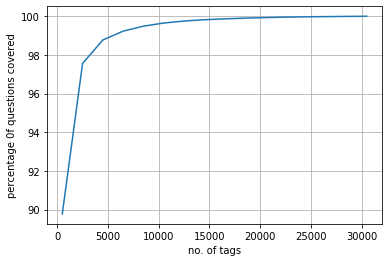

In [70]:
import matplotlib.pyplot as plt
plt.plot(np.arange(500,multilabel_y.shape[1],2000),percent_questions_per_tag)
plt.grid()
plt.xlabel("no. of tags")
plt.ylabel("percentage 0f questions covered")
plt.show()

In [71]:
#nearly 6000 tags covering more than 99 percent of questions
print(((preprocessed_data.shape[0]-questions_no_tag_among_n_tags(6000))/preprocessed_data.shape[0])*100)

99.14279828559657


In [72]:
print((6000/multilabel_y.shape[1])*100)

19.642506383814577


In [73]:
#17 percent of tags are containing 99.13% of data


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
multilabel_yw=multilabel_y[:,sorted_tags_i[:6000]]
print(multilabel_yw)

  (0, 7)	1
  (0, 2137)	1
  (1, 15)	1
  (1, 21)	1
  (1, 60)	1
  (1, 1787)	1
  (2, 29)	1
  (3, 8)	1
  (3, 322)	1
  (3, 593)	1
  (4, 13)	1
  (4, 1006)	1
  (5, 2)	1
  (5, 54)	1
  (6, 90)	1
  (6, 3)	1
  (7, 4)	1
  (7, 646)	1
  (8, 1535)	1
  (8, 5609)	1
  (9, 5)	1
  (10, 2398)	1
  (11, 0)	1
  (11, 173)	1
  (11, 1630)	1
  :	:
  (499989, 427)	1
  (499989, 276)	1
  (499990, 9)	1
  (499990, 82)	1
  (499990, 140)	1
  (499990, 390)	1
  (499991, 137)	1
  (499991, 135)	1
  (499991, 487)	1
  (499992, 2)	1
  (499992, 3)	1
  (499992, 5)	1
  (499993, 3)	1
  (499993, 5)	1
  (499994, 2)	1
  (499994, 2298)	1
  (499995, 303)	1
  (499996, 15)	1
  (499996, 21)	1
  (499997, 12)	1
  (499997, 9)	1
  (499997, 791)	1
  (499998, 29)	1
  (499998, 238)	1
  (499998, 1575)	1


In [76]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
X=vectorizer.fit_transform(preprocessed_data['question'])
print("Time taken to run this cell: ",datetime.now()-start)

Time taken to run this cell:  1:31:27.119119


In [77]:
print(X)

  (0, 87830)	0.13570468967946406
  (0, 43867)	0.16440013845395882
  (0, 41994)	0.20118631922429428
  (0, 81668)	0.2090346505783313
  (0, 5892)	0.19107091947316301
  (0, 83436)	0.19826923354863554
  (0, 68013)	0.19107091947316301
  (0, 49784)	0.20144910399876623
  (0, 3034)	0.16255409780194538
  (0, 79804)	0.14624944853025595
  (0, 41367)	0.11545272270002109
  (0, 87708)	0.07649354959271262
  (0, 572)	0.19512177210097376
  (0, 81478)	0.2946285043718171
  (0, 52301)	0.15424361153709287
  (0, 75434)	0.052312892165267806
  (0, 53123)	0.13858283104419855
  (0, 43850)	0.10965583901442379
  (0, 2090)	0.06396439740857579
  (0, 17962)	0.13643831737400167
  (0, 41982)	0.0976744065466522
  (0, 57282)	0.15939717321160923
  (0, 5850)	0.09440954081422953
  (0, 83429)	0.11404534102285888
  (0, 67549)	0.06166774510909458
  :	:
  (499998, 50197)	0.09529365455240285
  (499998, 59839)	0.031559610752707405
  (499998, 31599)	0.04077766309751872
  (499998, 31332)	0.034979533117278354
  (499998, 12896)	0.041

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,multilabel_yw,test_size=0.2,random_state=101)
# This takes about 8-10 hours to run.
# applying logisttic regression
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.07752


C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


macro f1 score : 0.08483840106257802
micro f1 scoore : 0.3671236965527915
hamming loss : 0.000381655


C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


Precision recall report :
               precision    recall  f1-score   support

           0       0.60      0.22      0.32      7610
           1       0.79      0.44      0.57      6945
           2       0.82      0.53      0.64      6480
           3       0.74      0.43      0.54      6047
           4       0.94      0.77      0.85      5306
           5       0.86      0.64      0.74      5086
           6       0.70      0.31      0.43      3340
           7       0.87      0.60      0.71      3045
           8       0.69      0.39      0.50      2991
           9       0.77      0.40      0.53      2987
          10       0.85      0.60      0.70      2804
          11       0.51      0.16      0.24      2682
          12       0.55      0.11      0.18      2696
          13       0.59      0.25      0.35      2294
          14       0.61      0.22      0.32      2313
          15       0.59      0.28      0.38      2179
          16       0.77      0.52      0.62      2128
